# EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering

#### Question 1

256


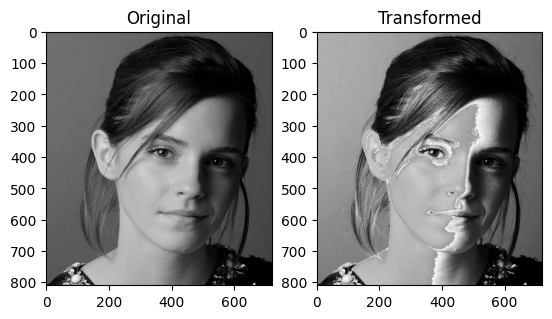

In [123]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Breakpoints from the graph (input, output)
c = np.array([(50, 50), (150, 255), (150, 150)])

# Create a lookup table (LUT) based on the breakpoints
# The LUT will map input pixel values to output pixel values
t1 = np.linspace(0, c[0,1], c[0,0] + 1, dtype=np.uint8)
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0], dtype=np.uint8)
t3 = np.linspace(c[2,1] + 1, 255, 255 - c[2,0], dtype=np.uint8)

# Concatenate segments to form the complete LUT
# Each segment corresponds to a range of input pixel values
transform = np.concatenate((t1, t2), axis=0)
transform = np.concatenate((transform, t3), axis=0).astype(np.uint8)
print(len(transform))  

# Load image (grayscale)
img_orig = cv.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)

# Apply LUT
image_transformed = cv.LUT(img_orig, transform)

# Display results
plt.subplot(1, 2, 1)
plt.imshow(img_orig, cmap='gray')
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(image_transformed, cmap='gray')
plt.title('Transformed')
plt.show()


#### Question 2

White Matter

(256,)


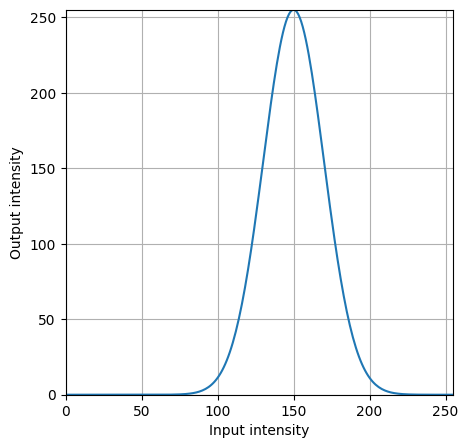

In [124]:
# Load image (grayscale)
image2 = cv.imread('images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

# Define the gaussian pulse
mu = 150
sigma = 20
x = np.linspace(0, 255, 256)
t = 255 * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Ensure the output is in the valid range for image intensities [0, 255]
t1 = np.clip(t, 0, 255)

print(t1.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

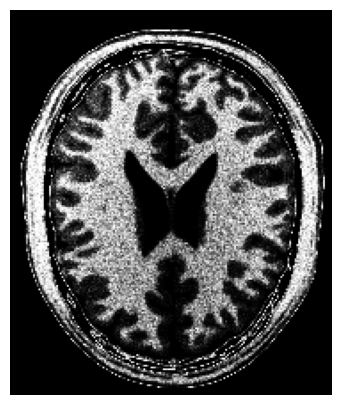

In [125]:
g = t1[image2]

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(g, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

Gray Matter

(256,)


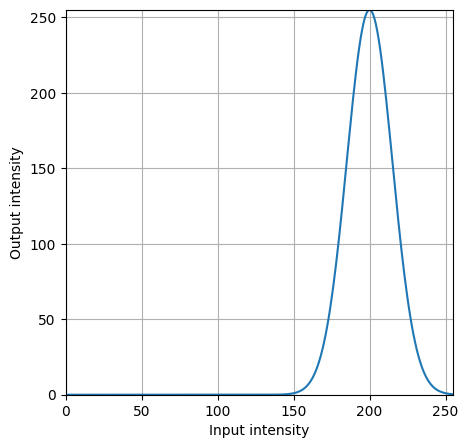

In [126]:
mu = 200
sigma = 15
x = np.linspace(0, 255, 256)
t = 255 * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Ensure the output is in the valid range for image intensities [0, 255]
t2 = np.clip(t, 0, 255)

print(t2.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

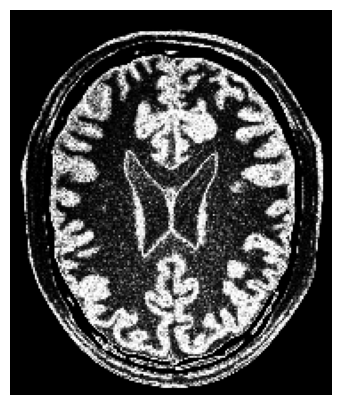

In [127]:
g = t2[image2]

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(g, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

#### Question 3

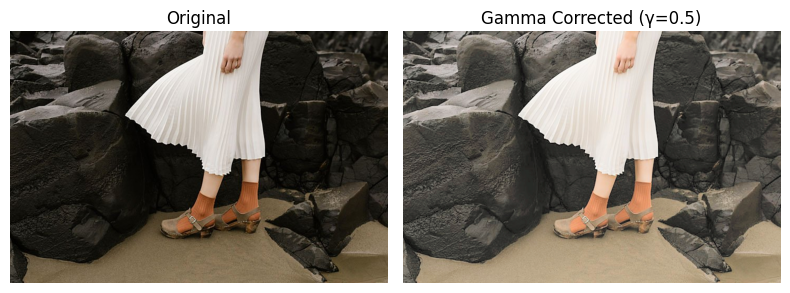

In [128]:
# Load the image in BGR color space
image3_bgr = cv.imread('Images/highlights_and_shadows.jpg')

# Convert the image to L*a*b* color space
image3_lab = cv.cvtColor(image3_bgr, cv.COLOR_BGR2LAB)

# Convert the image to RGB color space
image3_rgb = cv.cvtColor(image3_bgr, cv.COLOR_BGR2RGB)

# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

# Split the image in to L*a*b* color space
L,a,b = cv.split(image3_lab)

# Apply gamma correction to the L channel
gamma = 0.5
t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0, 256)]).astype('uint8')
L_modified = cv.LUT(L, t)

# Merge the channels
merged = cv.merge([L_modified, a, b])
image3_modified = cv.cvtColor(merged, cv.COLOR_LAB2RGB)

# Plot the first image
axs[0].imshow(image3_rgb)
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(image3_modified)
axs[1].set_title(f'Gamma Corrected (γ={gamma})')
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()

#### Question 4

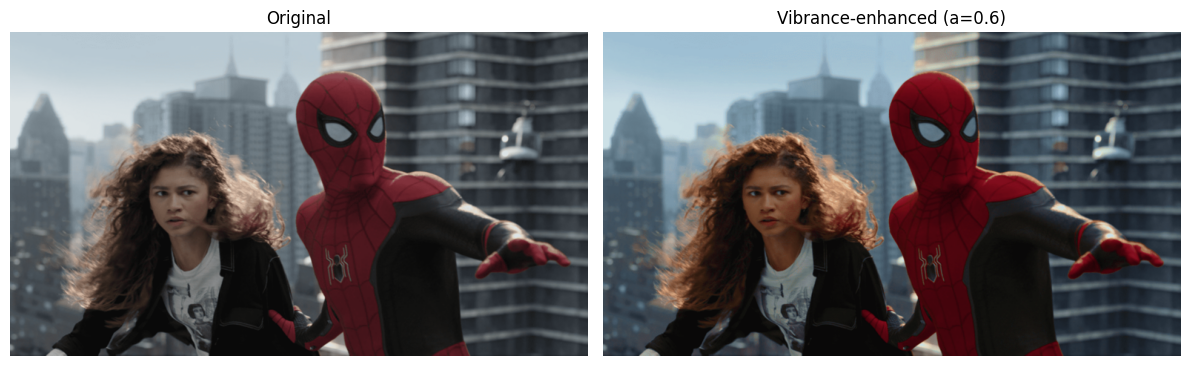

In [129]:
# Load image
image4_bgr = cv.imread('Images/spider.png')

# (a) Split into H, S, V planes 
image4_hsv = cv.cvtColor(image4_bgr, cv.COLOR_BGR2HSV)   
h, s, v = cv.split(image4_hsv)

# --- build LUT for the given transformation ---
# f(x) = min( x + a * 128 * exp(-(x-128)^2 / (2*sigma^2)), 255 )
a = 0.6
sigma = 70.0 
x = np.arange(0, 256)
f_x = np.minimum(x + a * 128 * np.exp(-((x - 128)**2) / (2 * sigma**2)), 255).astype('uint8')

# (b) Apply the intensity transformation to the saturation plane using LUT
s_transformed = cv.LUT(s, f_x)

# (c) Set a to get a visually pleasing output
a = 0.6

# (d) Recombine H, transformed S, V
hsv_new = cv.merge([h, s_transformed, v])
image4_bgr_vibrant = cv.cvtColor(hsv_new, cv.COLOR_HSV2BGR)

# (e) Display results: original, enhanced, and the transform curve
plt.figure(figsize=(12,5))

# Display the original image
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(image4_bgr, cv.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

# Display the vibrance-enhanced image
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(image4_bgr_vibrant, cv.COLOR_BGR2RGB))
plt.title(f"Vibrance-enhanced (a={a})")
plt.axis("off")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



Intensity Transformation Curve

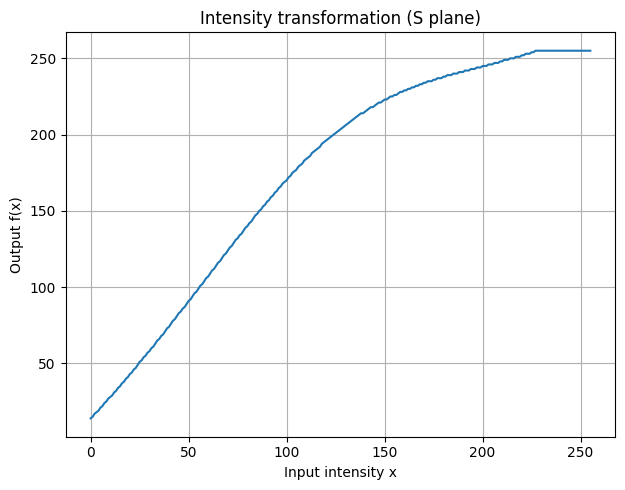

In [130]:
plt.figure(figsize=(12,5))

# Display the intensity transformation curve
plt.subplot(1,2,1)
plt.plot(x, f_x)
plt.title("Intensity transformation (S plane)")
plt.xlabel("Input intensity x")
plt.ylabel("Output f(x)")
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


#### Question 5

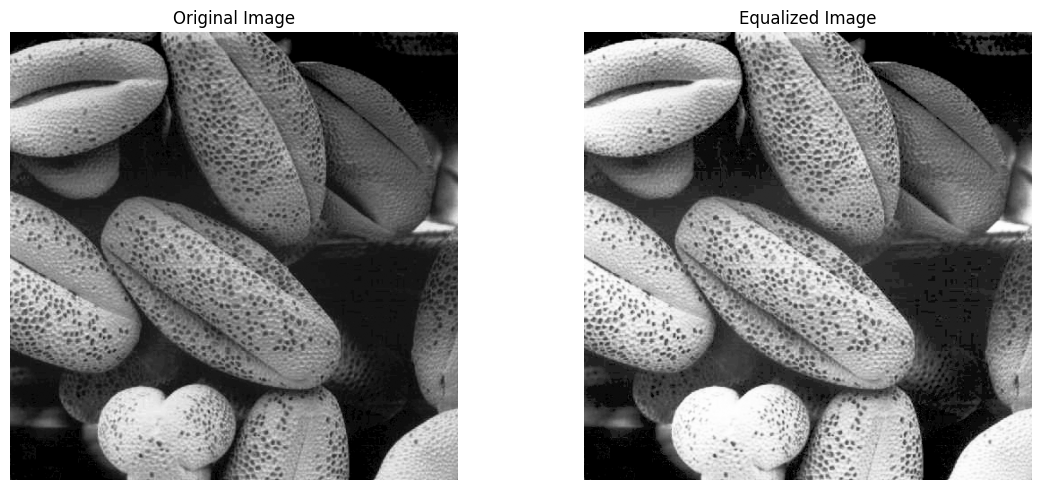

In [131]:
# Load image
image5 = cv.imread('Images/shells.tif', cv.IMREAD_GRAYSCALE)

def histogram_equalization(f):
    L = 256
    M, N = f.shape

    # Compute histogram (256 bins, pixel range 0-255)
    hist = cv.calcHist([f], [0], None, [L], [0, L])
    hist = hist.flatten()

    # Compute cumulative distribution function (CDF)
    cdf = hist.cumsum()

    # Normalize CDF so that max = L-1
    cdf_normalized = (cdf - cdf.min()) * (L - 1) / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype('uint8')

    # Map original image pixels through the normalized CDF as transformation function
    equalized_img = cdf_normalized[f]

    return equalized_img, hist

eq_image, hist_before = histogram_equalization(image5)

# Histogram after equalization
hist_after = cv.calcHist([eq_image], [0], None, [256], [0, 256]).flatten()

# Plotting
plt.figure(figsize=(12,5))

# Display the original image
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(image5, cmap='gray')
plt.axis('off')

# Display the equalized image
plt.subplot(1,2,2)
plt.title('Equalized Image')
plt.imshow(eq_image, cmap='gray')
plt.axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Histograms before and after equalization

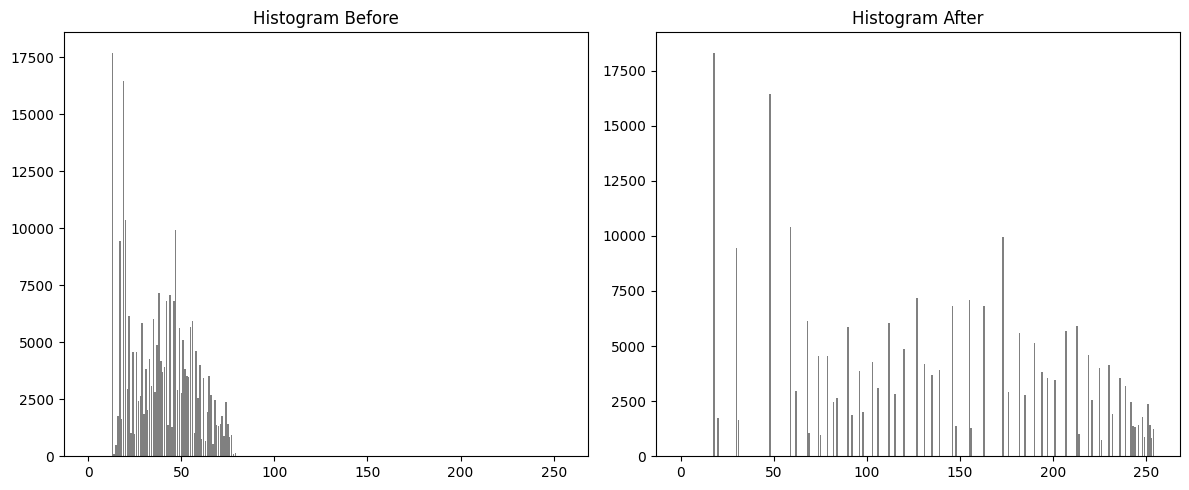

In [132]:
# Plotting
plt.figure(figsize=(12,5))

# Display the histogram before equalization
plt.subplot(1,2,1)
plt.title('Histogram Before')
plt.bar(range(256), hist_before, color='gray')

# Display the histogram after equalization
plt.subplot(1,2,2)
plt.title('Histogram After')
plt.bar(range(256), hist_after, color='gray')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### Question 6

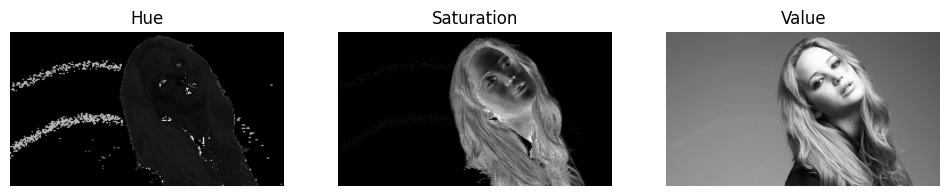

In [133]:
# (a) Load image and split into H, S, V planes
image6 = cv.imread('Images/jeniffer.jpg')  
hsv = cv.cvtColor(image6, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)

# Display H, S, V as grayscale images
plt.figure(figsize=(12,4))
for i, (plane, title) in enumerate(zip([h, s, v], ['Hue', 'Saturation', 'Value'])):
    plt.subplot(1,3,i+1)
    plt.imshow(plane, cmap='gray')
    plt.title(title)
    plt.axis('off')
plt.show()



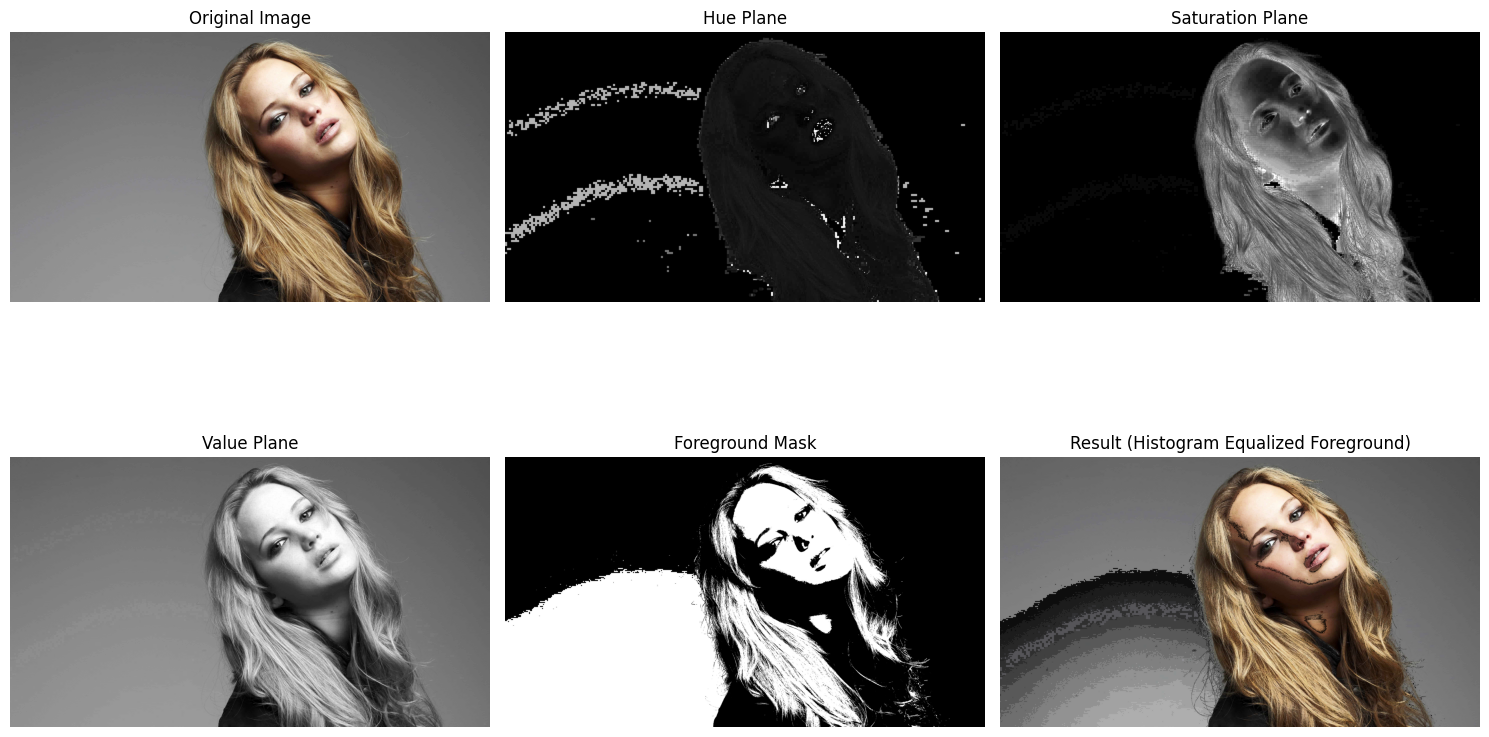

In [134]:
# (b) Threshold appropriate plane to get foreground mask
# Generally, foreground is well represented in Saturation or Value plane
# Let's threshold on Value (v) to get brighter foreground
_, mask = cv.threshold(v, 128, 255, cv.THRESH_BINARY)  # Adjust threshold as needed

# (c) Obtain foreground only using bitwise_and, compute histogram
foreground = cv.bitwise_and(v, v, mask=mask)

hist_foreground = cv.calcHist([foreground], [0], mask, [256], [0,256])
hist_foreground = hist_foreground.flatten()

# (d) Compute cumulative sum of histogram (CDF)
cdf_foreground = np.cumsum(hist_foreground)

# (e) Histogram equalization on foreground pixels only
# Normalize CDF to [0,255]
cdf_min = cdf_foreground[np.nonzero(cdf_foreground)].min()  # avoid zeros
num_foreground_pixels = cdf_foreground[-1]

# Compute transformation function T(r_k)
T = np.round((cdf_foreground - cdf_min) / (num_foreground_pixels - cdf_min) * 255).astype('uint8')
T[T < 0] = 0  # Clip any negative values

# Map original foreground pixel intensities through T
equalized_foreground = np.copy(foreground)
# Vectorized mapping for pixels inside the mask only
indices = np.where(mask == 255)
equalized_foreground[indices] = T[foreground[indices]]

# (f) Extract background and add with equalized foreground
background = cv.bitwise_and(v, v, mask=cv.bitwise_not(mask))

# Combine background and equalized foreground
result_v = cv.add(background, equalized_foreground)

# Merge with original H and S planes to get full HSV image
result_hsv = cv.merge([h, s, result_v])
result_bgr = cv.cvtColor(result_hsv, cv.COLOR_HSV2BGR)

# Show all outputs
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(image6, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2,3,2)
plt.title('Hue Plane')
plt.imshow(h, cmap='gray')
plt.axis('off')

plt.subplot(2,3,3)
plt.title('Saturation Plane')
plt.imshow(s, cmap='gray')
plt.axis('off')

plt.subplot(2,3,4)
plt.title('Value Plane')
plt.imshow(v, cmap='gray')
plt.axis('off')

plt.subplot(2,3,5)
plt.title('Foreground Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(2,3,6)
plt.title('Result (Histogram Equalized Foreground)')
plt.imshow(cv.cvtColor(result_bgr, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


#### Question 7

(a) Using the existing filter to Sobel filter the image

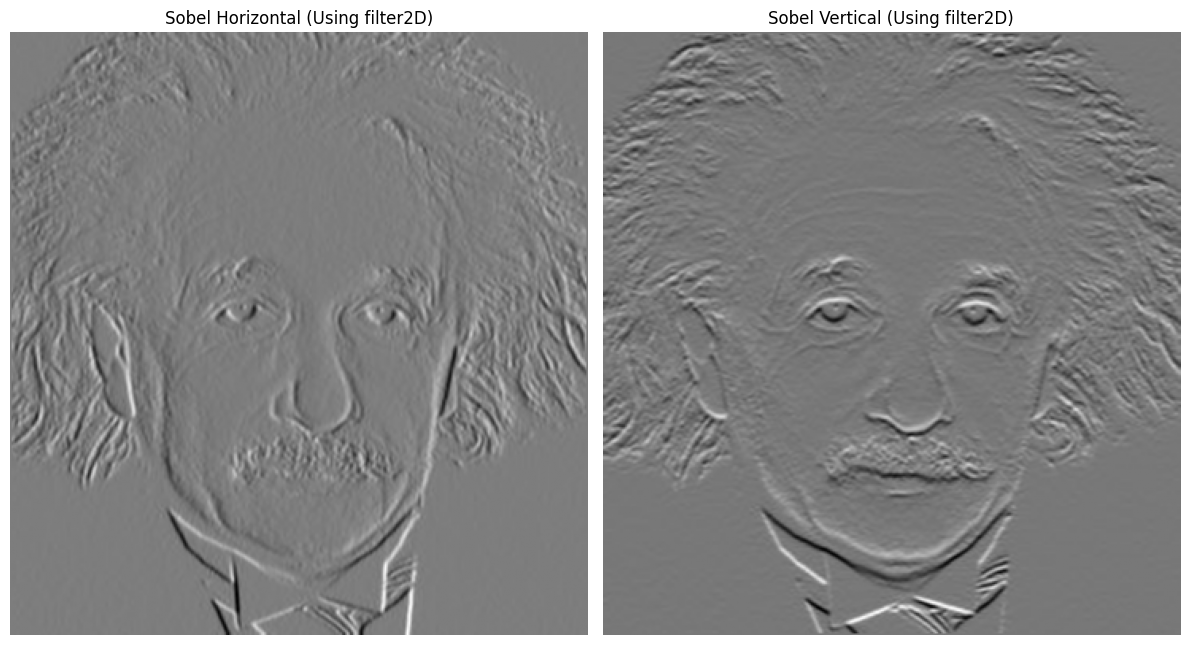

In [135]:
# Load grayscale image
image7 = cv.imread('Images/einstein.png', cv.IMREAD_GRAYSCALE)

# Sobel kernels (horizontal and vertical)
sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]], dtype=np.float32)

sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]], dtype=np.float32)

# Apply the Sobel filter in the X direction
sobel_x_filtered = cv.filter2D(image7, cv.CV_64F, sobel_x)

# Apply the Sobel filter in the Y direction
sobel_y_filtered = cv.filter2D(image7, cv.CV_64F, sobel_y)

# Create the figure for plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

ax[0].imshow(sobel_x_filtered, cmap='gray')
ax[0].set_title('Sobel Horizontal (Using filter2D)')
ax[0].axis("off")
ax[1].imshow(sobel_y_filtered, cmap='gray')
ax[1].set_title('Sobel Vertical (Using filter2D)')
ax[1].axis("off")

plt.tight_layout()
plt.show()

(b) Writing own code to sobel filter the image

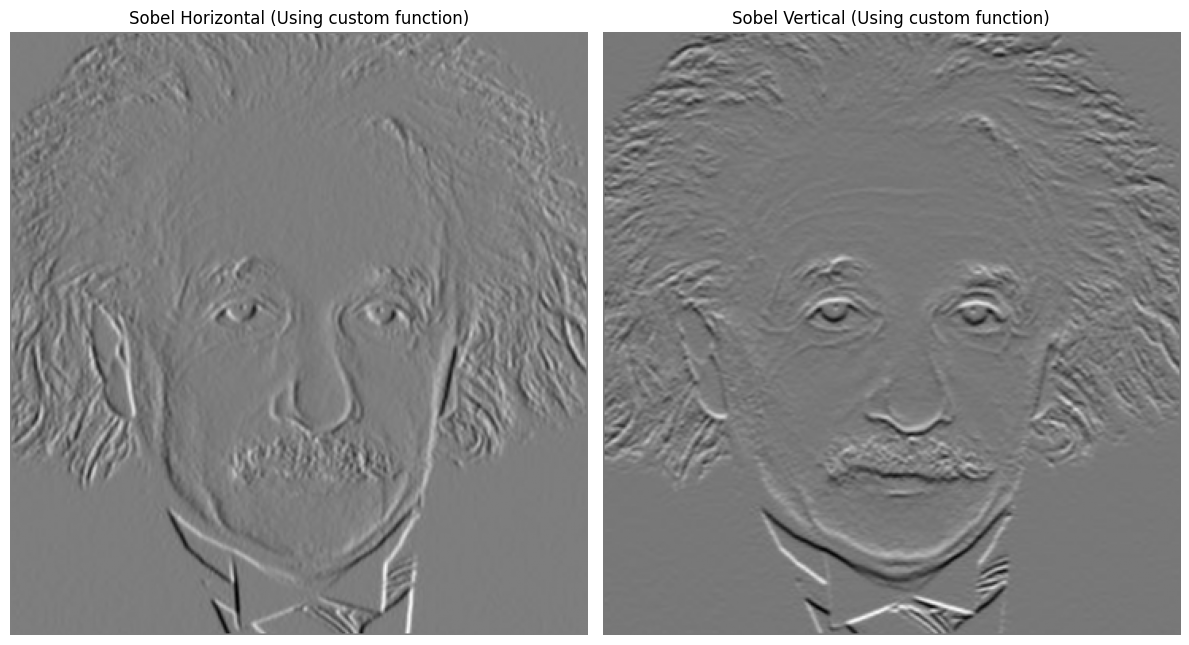

In [136]:
def apply_filter(image, filter):
    [rows, columns] = np.shape(image) # Get rows and columns of the image
    filtered_image = np.zeros(shape=(rows, columns)) # Create empty image
    
    for i in range(rows - 2):
        for j in range(columns - 2): # Process 2D convolution
            value = np.sum(np.multiply(filter, image[i:i + 3, j:j + 3])) 
            filtered_image[i + 1, j + 1] = value
    
    return filtered_image

# Apply the Sobel filter in the X direction
sobel_x_filtered = apply_filter(image7, sobel_x)

# Apply the Sobel filter in the Y direction
sobel_y_filtered = apply_filter(image7, sobel_y)

# Create the figure for plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

ax[0].imshow(sobel_x_filtered, cmap='gray')
ax[0].set_title('Sobel Horizontal (Using custom function)')
ax[0].axis("off")
ax[1].imshow(sobel_y_filtered, cmap='gray')
ax[1].set_title('Sobel Vertical (Using custom function)')
ax[1].axis("off")

plt.tight_layout()
plt.show()

(c) Using seperable convolution

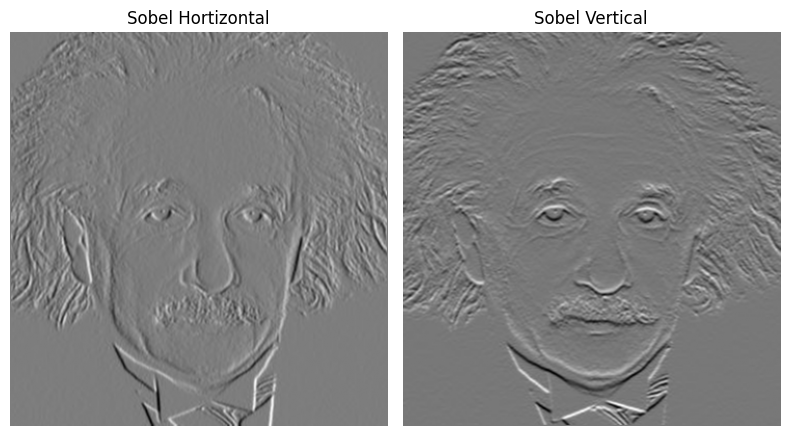

In [ ]:
# Sobel x filter separated
sobel_x_vertical = np.array([[1], [2], [1]])
sobel_x_horizontal = np.array([[1, 0, -1]])

# Sobel y filter separated
sobel_y_vertical = np.array([[1], [0], [-1]])
sobel_y_horizontal = np.array([[1, 2, 1]])

# Apply Sobel X
x_mid = cv.filter2D(image7, cv.CV_64F, sobel_x_horizontal)
x_filtered_image = cv.filter2D(x_mid, cv.CV_64F, sobel_x_vertical)

# Apply Sobel Y
y_mid = cv.filter2D(image7, cv.CV_64F, sobel_y_vertical)
y_filtered_image = cv.filter2D(y_mid, cv.CV_64F, sobel_y_horizontal)

# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(8, 6))

ax[0].imshow(x_filtered_image, cmap='gray')
ax[0].set_title('Sobel Hortizontal')
ax[0].axis("off")

ax[1].imshow(y_filtered_image, cmap='gray')
ax[1].set_title('Sobel Vertical')
ax[1].axis("off")

plt.tight_layout()
plt.show()


#### Question 7

In [144]:
# Zoom function
def zoom(img, technique, scale=4):
    if technique == 'nn':  # Nearest Neighbor
        return cv.resize(img, None, fx=scale, fy=scale, interpolation=cv.INTER_NEAREST)
    elif technique == 'bilinear':  # Bilinear Interpolation
        return cv.resize(img, None, fx=scale, fy=scale, interpolation=cv.INTER_LINEAR)
    else:
        raise ValueError("Technique must be 'nn' or 'bilinear'.")

# Normalized SSD calculation
def norm_SSD(img1, img2):
    if img1.shape != img2.shape:
        raise ValueError("Images must have the same dimensions.")
    return np.sum((img1.astype(np.float32) - img2.astype(np.float32)) ** 2) / img1.size

Image 1

Normalized SSD for Nearest Neighbour: 136.26906
Normalized SSD for Bilinear: 115.09185


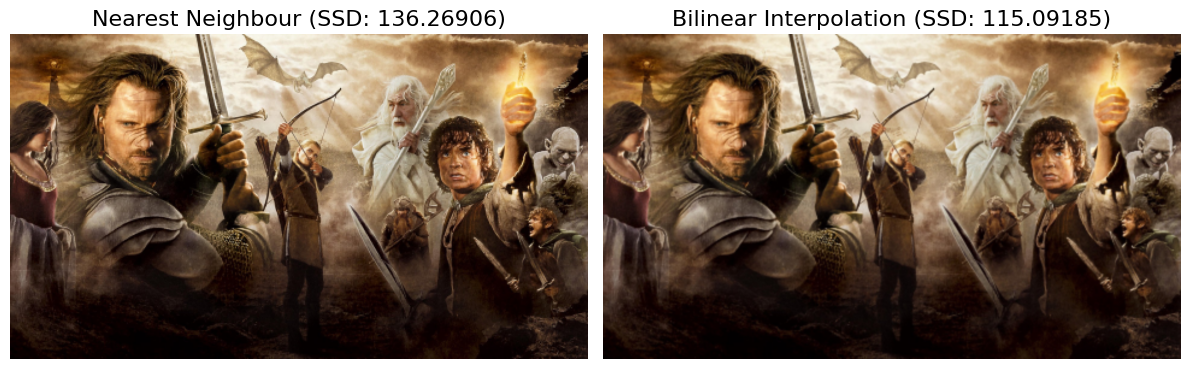

In [145]:
# Load images
im1 = cv.imread('Images/Question 5/im01.png')
im1_small = cv.imread('Images/Question 5/im01small.png')

# Zoom the smaller image
im1_zoomed_nn = zoom(im1_small, technique='nn')
im1_zoomed_bilinear = zoom(im1_small, technique='bilinear')

# Compute SSD
nn_SSD = norm_SSD(im1, im1_zoomed_nn)
bilinear_SSD = norm_SSD(im1, im1_zoomed_bilinear)

# Print SSD values
print(f'Normalized SSD for Nearest Neighbour: {nn_SSD:.5f}')
print(f'Normalized SSD for Bilinear: {bilinear_SSD:.5f}')

# Plot results
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

axs[0].imshow(cv.cvtColor(im1_zoomed_nn, cv.COLOR_BGR2RGB))
axs[0].set_title(f'Nearest Neighbour (SSD: {nn_SSD:.5f})', fontsize=16)
axs[0].axis('off')

axs[1].imshow(cv.cvtColor(im1_zoomed_bilinear, cv.COLOR_BGR2RGB))
axs[1].set_title(f'Bilinear Interpolation (SSD: {bilinear_SSD:.5f})', fontsize=16)
axs[1].axis('off')

plt.tight_layout()
plt.show()

Image 2

Normalized SSD for Nearest Neighbour: 26.44607
Normalized SSD for Bilinear: 18.34591


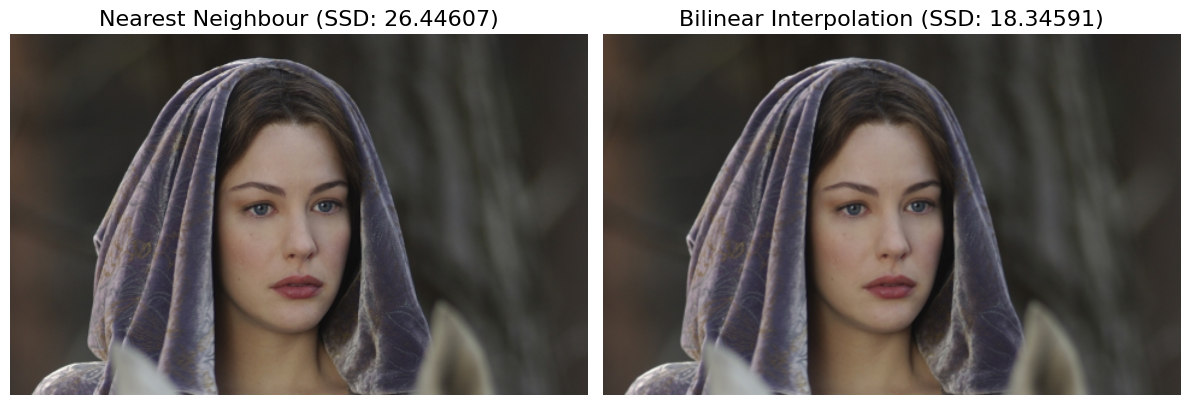

In [149]:
# Load images
im2 = cv.imread('Images/Question 5/im02.png')
im2_small = cv.imread('Images/Question 5/im02small.png')

# Zoom the smaller image
im2_zoomed_nn = zoom(im2_small, technique='nn')
im2_zoomed_bilinear = zoom(im2_small, technique='bilinear')

# Compute SSD
nn_SSD = norm_SSD(im2, im2_zoomed_nn)
bilinear_SSD = norm_SSD(im2, im2_zoomed_bilinear)

# Print SSD values
print(f'Normalized SSD for Nearest Neighbour: {nn_SSD:.5f}')
print(f'Normalized SSD for Bilinear: {bilinear_SSD:.5f}')

# Plot results
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

axs[0].imshow(cv.cvtColor(im2_zoomed_nn, cv.COLOR_BGR2RGB))
axs[0].set_title(f'Nearest Neighbour (SSD: {nn_SSD:.5f})', fontsize=16)
axs[0].axis('off')

axs[1].imshow(cv.cvtColor(im2_zoomed_bilinear, cv.COLOR_BGR2RGB))
axs[1].set_title(f'Bilinear Interpolation (SSD: {bilinear_SSD:.5f})', fontsize=16)
axs[1].axis('off')

plt.tight_layout()
plt.show()

Image 3

Normalized SSD for Nearest Neighbour: 136.26906
Normalized SSD for Bilinear: 115.09185


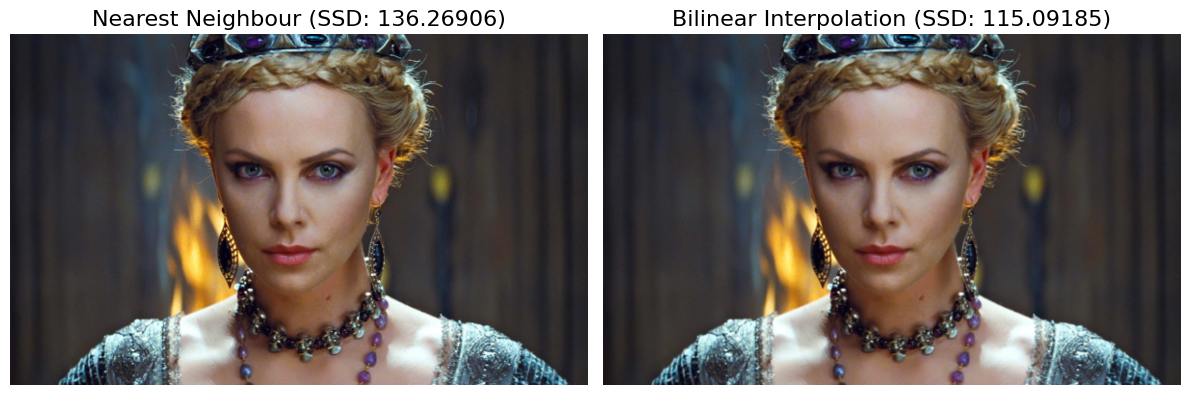

In [152]:
# Load images
im3 = cv.imread('Images/Question 5/im03.png')
im3_small = cv.imread('Images/Question 5/im03small.png')

# Zoom the smaller image
im3_zoomed_nn = zoom(im3_small, technique='nn')
im3_zoomed_bilinear = zoom(im3_small, technique='bilinear')

# Compute SSD
nn_SSD = norm_SSD(im1, im1_zoomed_nn)
bilinear_SSD = norm_SSD(im1, im1_zoomed_bilinear)

# Print SSD values
print(f'Normalized SSD for Nearest Neighbour: {nn_SSD:.5f}')
print(f'Normalized SSD for Bilinear: {bilinear_SSD:.5f}')

# Plot results
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

axs[0].imshow(cv.cvtColor(im3_zoomed_nn, cv.COLOR_BGR2RGB))
axs[0].set_title(f'Nearest Neighbour (SSD: {nn_SSD:.5f})', fontsize=16)
axs[0].axis('off')

axs[1].imshow(cv.cvtColor(im3_zoomed_bilinear, cv.COLOR_BGR2RGB))
axs[1].set_title(f'Bilinear Interpolation (SSD: {bilinear_SSD:.5f})', fontsize=16)
axs[1].axis('off')

plt.tight_layout()
plt.show()